In [ ]:
# Setup Reveal.JS
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
# ipyleaflet hack to load full map in Reveal.js
# These settings are also injected into the notebook metadata
# (Edit -> Edit Notebook Metadata), which is the preferred method
cm.update(
    "rise",
    {"minScale": 1.25,
     "width": "80%"}
)

# Title
## Subtitle

Author name

# First slide

Content of the first slide

In [1]:
%matplotlib inline
import numpy as np

In [2]:
np.random.randint(low=1, high=7, size=15)

array([2, 3, 3, 6, 5, 1, 1, 1, 2, 5, 4, 6, 6, 2, 1])

# Second slide

Example of ipyleaflet showing maps

In [3]:
from ipyleaflet import Map, Marker

In [4]:
center = (52.204793, 360.121558)
m = Map(center=center, zoom=15)
marker = Marker(location=center, draggable=True)
m.add_layer(marker);
display(m)

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Example of heatmap on top of map

In [5]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=2)

heatmap = Heatmap(
    locations=[[uniform(-80, 80), uniform(-180, 180), uniform(0, 1000)] for i in range(2000)],
    radius=20,
    gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Opendata Bristol

Example of OpenData Bristol on top of Bristol's map

In [6]:
air_quality_bristol_query = 'https://opendata.bristol.gov.uk/api/records/1.0/search/?dataset=air-quality-data-continuous&q=&rows=1000&sort=date_time&facet=date_time&facet=coordinates&facet=temp'

import urllib, json

response = urllib.request.urlopen(air_quality_bristol_query)

data = json.loads(response.read())

print('Json root keys')
print(data.keys())
print('3 records')
data['records'][:3]

Json root keys
dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])
3 records


[{'datasetid': 'air-quality-data-continuous',
  'recordid': '1d1d15b415365cf095c9e8a528ce5969359edbb3',
  'fields': {'datestart': '2002-02-01T00:00:00+00:00',
   'temp': 6.444444,
   'date_time': '2021-02-18T19:00:00+00:00',
   'no': 14.0911,
   'geo_point_2d': [51.432675707, -2.60495665673],
   'current': 'True',
   'nox': 61.056562,
   'location': 'Parson Street School',
   'siteid': 215,
   'no2': 39.3975,
   'rh': 18.34676,
   'instrumenttype': 'Continuous (Reference)',
   'pm25': 7.9548238},
  'geometry': {'type': 'Point', 'coordinates': [-2.60495665673, 51.432675707]},
  'record_timestamp': '2021-02-18T19:15:10.876000+00:00'},
 {'datasetid': 'air-quality-data-continuous',
  'recordid': 'fd3de22d5f89764095f4af04234f48400c9d568c',
  'fields': {'datestart': '2009-03-13T00:00:00+00:00',
   'date_time': '2021-02-18T19:00:00+00:00',
   'no': 18.8297,
   'geo_point_2d': [51.4780449714, -2.53523027459],
   'current': 'True',
   'nox': 76.643439,
   'location': 'Fishponds Road',
   'sitei

In [7]:
def get_records(data, fields=None):
    '''
    data: json object
    fields: list of strings
        Each dictionary entry with the field name is retrieved in the given order
    return
    list of list of values
    '''
    for record in data['records']:
        record_fields = record['fields']
        if fields is None:
            yield record_fields
        else:
            for key in fields:
                yield [record_fields.get(key, np.nan) for key in fields]

fields = ['date_time', 'geo_point_2d', 'temp', 'no', 'no2', 'nox']
                
record_values = list(get_records(data, fields=fields))

record_values[:5]

[['2021-02-18T19:00:00+00:00',
  [51.432675707, -2.60495665673],
  6.444444,
  14.0911,
  39.3975,
  61.056562],
 ['2021-02-18T19:00:00+00:00',
  [51.432675707, -2.60495665673],
  6.444444,
  14.0911,
  39.3975,
  61.056562],
 ['2021-02-18T19:00:00+00:00',
  [51.432675707, -2.60495665673],
  6.444444,
  14.0911,
  39.3975,
  61.056562],
 ['2021-02-18T19:00:00+00:00',
  [51.432675707, -2.60495665673],
  6.444444,
  14.0911,
  39.3975,
  61.056562],
 ['2021-02-18T19:00:00+00:00',
  [51.432675707, -2.60495665673],
  6.444444,
  14.0911,
  39.3975,
  61.056562]]

In [8]:
m = Map(center=(51.454500, -2.587900), zoom=12)
gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}

position_id = []

field_map = {field: i for i, field in enumerate(fields)}
heatmap = Heatmap(
    locations=[[values[field_map['geo_point_2d']][0],
                values[field_map['geo_point_2d']][1],
                values[field_map['no']]] for values in record_values],
    radius=20,
    gradient=gradient
)

m.add_layer(heatmap);
display(m)

Map(center=[51.4545, -2.5879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

# Pandas dataframe

We will use pandas to analyse the data

In [9]:
import pandas as pd
df_records = pd.DataFrame(record_values, columns=fields)
df_records[['Longitude', 'Latitude']] = pd.DataFrame(df_records['geo_point_2d'].tolist(), index= df_records.index)
df_records = df_records.sort_values(by='date_time')
df_records = df_records.drop_duplicates(subset=['Longitude', 'Latitude'], keep='first')
df_records

,date_time,geo_point_2d,temp,no,no2,nox,Longitude,Latitude
5999,2021-02-12T16:00:00+00:00,"[51.4579497129, -2.58398909033]",NaN,39.789000,65.025000,126.034000,51.457950,-2.583989
5970,2021-02-12T16:00:00+00:00,"[51.4628294172, -2.58454081635]",NaN,3.118000,15.874000,20.655000,51.462829,-2.584541
5976,2021-02-12T16:00:00+00:00,"[51.4278638883, -2.56374153315]",NaN,18.455600,22.902188,51.207188,51.427864,-2.563742
5982,2021-02-12T16:00:00+00:00,"[51.432675707, -2.60495665673]",1.688646,62.942324,71.957813,168.443439,51.432676,-2.604957
5993,2021-02-12T16:00:00+00:00,"[51.4552693825, -2.59664882861]",NaN,21.561322,45.361311,78.433747,51.455269,-2.596649
5944,2021-02-12T17:00:00+00:00,"[51.4780449714, -2.53523027459]",NaN,22.944800,35.381250,70.571250,51.478045,-2.535230
5968,2021-02-12T17:00:00+00:00,"[51.4417471802, -2.55995583224]",NaN,3.834525,17.834062,23.667188,51.441747,-2.559956


# Binary probabilistic classifier

Simulation of a probabilistic classifier with a linear transformation to convert raw values into the interval [0, 1]

In [10]:
df_records = df_records.dropna(subset=['no'])
df_records['no_scaled'] = (df_records['no'] - df_records['no'].min())/(df_records['no'].max() - df_records['no'].min())

In [11]:
locations = df_records[['Longitude', 'Latitude', 'no_scaled']].values
locations = [list(row) for row in locations]

In [12]:
m = Map(center=(51.454500, -2.587900), zoom=12)
gradient={0.0: 'blue', 1.0: 'red'}

heatmap = Heatmap(
    locations=locations,
    radius=40,
    gradient=gradient,
    min_opacity=0.5,
)

m.add_layer(heatmap);
display(m)

Map(center=[51.4545, -2.5879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [13]:
df_records

,date_time,geo_point_2d,temp,no,no2,nox,Longitude,Latitude,no_scaled
5999,2021-02-12T16:00:00+00:00,"[51.4579497129, -2.58398909033]",NaN,39.789000,65.025000,126.034000,51.457950,-2.583989,0.612978
5970,2021-02-12T16:00:00+00:00,"[51.4628294172, -2.58454081635]",NaN,3.118000,15.874000,20.655000,51.462829,-2.584541,0.000000
5976,2021-02-12T16:00:00+00:00,"[51.4278638883, -2.56374153315]",NaN,18.455600,22.902188,51.207188,51.427864,-2.563742,0.256377
5982,2021-02-12T16:00:00+00:00,"[51.432675707, -2.60495665673]",1.688646,62.942324,71.957813,168.443439,51.432676,-2.604957,1.000000
5993,2021-02-12T16:00:00+00:00,"[51.4552693825, -2.59664882861]",NaN,21.561322,45.361311,78.433747,51.455269,-2.596649,0.308291
5944,2021-02-12T17:00:00+00:00,"[51.4780449714, -2.53523027459]",NaN,22.944800,35.381250,70.571250,51.478045,-2.535230,0.331417
5968,2021-02-12T17:00:00+00:00,"[51.4417471802, -2.55995583224]",NaN,3.834525,17.834062,23.667188,51.441747,-2.559956,0.011977


# Simulate probabilistic linear classifier

We start by a uniform value through all the map.

The points are uniformly distributed across the latitude and longitude at 2 degrees on every direction. Because the equirectangular projection the latitude degrees seem to be more spaced on the poles, and very concentrated near the equator. The longitudinal distribution is not affected on this representation. 

In [14]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)


nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = np.ones_like(lonv)*500 #100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=10,
    gradient={0.0: 'blue', 1.0: 'red'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# North vs South

Simulation of a probabilistic classifier that predicts the probability of North vs South poles.

We will first generate a grid of 2 degrees in every direction and assign probabilities and will visualise in a Matplotlib heatmap.

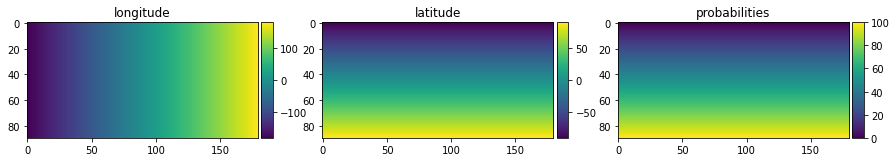

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

fig = plt.figure(figsize=(15, 5))
for i, (name, matrix) in enumerate({'longitude': lonv, 'latitude': latv, 'probabilities': probs}.items()):
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title(name)
    img = ax.imshow(matrix.T)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)

If we show the probability of North it seems that the probability of South has an alpha transparency of 1.0. Making it difficult to see the South (yellow) predictions.

In [16]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)

nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'yellow', 0.5: 'green', 1.0: 'blue'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [17]:
m = Map(center=(0, 0), zoom=0)

probs_s = 100 - probs

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs_s[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

It is necessary to show the probability of both classes in separate layers, given that the probabilities near 0 have the alpha channel to 1 and are not visible. 

In [18]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)


nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'yellow', 0.5: 'green', 1.0: 'blue'}
)

m.add_layer(heatmap);

probs = 100 - probs

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Avoid projection deformation

In order to avoid the deformation of the grid from the sphere to the rectangle we can zoom into a smaller region of the map, as the deformation is less apparent. But the zoom and the heatmap still behave in a non-ideal way. It is very difficult to adjust a proper set of parameters for the heatmap to work with short and long zoom levels.

In [19]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(55, 0), zoom=4.3)


nlon, nlat = (100, 100)
lon = np.linspace(-10, 10, nlon)
lat = np.linspace(50, 60, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

color_per_class = [{0.0: 'yellow', 0.5: 'green', 1.0: 'blue'},
                   {0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}]

for (gradient, values) in zip(*[color_per_class, [probs, 100 - probs]]):
    heatmap = Heatmap(
        locations=[[latv[i,j], lonv[i,j], values[i,j]] for i in range(nlon) for j in range(nlat)],
        radius=20,
        gradient=gradient
    )

    m.add_layer(heatmap);



## Example of linear classifier

In [20]:
display(m)

Map(center=[55, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [21]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


# Country contours and Search Engine

The following is an example of country contours and the option to search for country names.

In [22]:
import json
import os
import requests

from ipyleaflet import AwesomeIcon, GeoJSON, Map, Marker, LayerGroup, SearchControl

m = Map(zoom=3, center=[19.1646, 72.8493])

if not os.path.exists('countries.geo.json'):
      url = 'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json'
      r = requests.get(url)
      with open('countries.geo.json', 'w') as f:
        f.write(r.content.decode("utf-8"))

with open("countries.geo.json") as f:
    data = json.load(f)

countries = GeoJSON(data=data)

layer_group = LayerGroup(layers=(countries,))
marker = Marker(icon=AwesomeIcon(name="check", marker_color='green', icon_color='darkred'))

m.add_control(SearchControl(
  position="topleft",
  layer=layer_group,
  zoom=4,
  property_name='name',
  marker=marker
))

m

Map(center=[19.1646, 72.8493], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [23]:
from ipyleaflet import Map, ImageOverlay

m = Map(center=(25, -115), zoom=4)

image = ImageOverlay(
    #url="https://i.imgur.com/06Q1fSz.png",
    url="./06Q1fSz_alpha.png",
    #url='../06Q1fSz.png',
    bounds=((13, -130), (32, -100))
)

m.add_layer(image);
m

Map(center=[25, -115], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [24]:
import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear

def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/us-states.json',
    'us-states.json',
     json.load)

unemployment = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/US_Unemployment_Oct2012.csv',
    'US_Unemployment_Oct2012.csv',
     pd.read_csv)

unemployment =  dict(zip(unemployment['State'].tolist(), unemployment['Unemployment'].tolist()))

layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=unemployment,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

The two coordinates in the map are

- longitude : [-180, 180] (West of the map, East of the map)
- latitude : [-90, 90] (South pole, North pole)

Altough while writing or speaking it is more common to use only positive values, and indicate West as a negative longitude and South as a negative latitude.
The longitude zero corresponds to the prime meridian which crosses Greenwich, while the latitude zero corresponds to the equator line. The Null island is in the intersection of these two lines (0N, 0E) in hte Gulf of Guinea which depicts a weather buoy maintained by PIRATA (Prediction and Research Moored Array in the Atlantic).

The coordinates are always specified as latitude first and longitude second, eg. Bristol center is 51.4545° N, 2.5879° W

In [25]:
import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear

regions = {
    "type": "FeatureCollection",
    "features":[{
        "type":"Feature",
        "id":"YS",
        "properties":{"name":"Yellow Square"},
        "geometry":{
            "type":"Polygon",
            "coordinates": [[[-2,2],
                             [-2,-2],
                             [2,-2],
                             [2,2]]]
        }
    },
    {
        "type":"Feature",
        "id":"RS",
        "properties":{"name":"Red Square"},
        "geometry":{
            "type":"Polygon",
            "coordinates": [[[2,2],
                             [8,2],
                             [8,8],
                             [2,8]]]
        }
    }]
}

colors = {'YS': 0, 'RS': 1}

layer = ipyleaflet.Choropleth(
    geo_data=regions,
    choro_data=colors,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.7, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (0,0), zoom = 4)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [26]:
samples_c0 = 500
samples_c1 = 500
x_class_0 = np.random.multivariate_normal(mean=[40.4637, -3.7492], cov=[[5,0],[0,5]], size=samples_c0)
x_class_1 = np.random.multivariate_normal(mean=[45.4637, 2.7492], cov=[[5,0],[0,5]], size=samples_c1)
y_class_0 = np.zeros((samples_c0, 1))
y_class_1 = np.ones((samples_c1, 1))

locations_c0 = np.hstack((x_class_0, np.ones((samples_c0, 1))))
locations_c1 = np.hstack((x_class_1, np.ones((samples_c1, 1))))
locations_c0[:5]

array([[40.98025693, -2.64008234,  1.        ],
       [41.865864  , -4.06112675,  1.        ],
       [39.21387054, -5.52711965,  1.        ],
       [43.36341551, -3.02957726,  1.        ],
       [40.6931314 , -4.13008804,  1.        ]])

In [27]:
m = Map(center=(40.4637, -3.7492), zoom=4)


heatmap = Heatmap(
    locations=locations_c0.tolist(),
    radius=5,
    gradient={0.0: 'red', 1.0: 'red'},
    min_opacity=1,
)

m.add_layer(heatmap);

heatmap = Heatmap(
    locations=locations_c1.tolist(),
    radius=5,
    gradient={0.0: 'blue', 1.0: 'blue'},
    min_opacity=1,
)

m.add_layer(heatmap);
display(m)

Map(center=[40.4637, -3.7492], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

We train a Logistic Regression to discriminate the two classes

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

x = np.vstack((x_class_0, x_class_1))
y = np.squeeze(np.vstack((y_class_0, y_class_1)))

clf = LogisticRegression()
#clf = RandomForestClassifier()
clf.fit(x, y)

LogisticRegression()

And next we see the probabilities given in a large region around both classes

In [29]:
nlon, nlat = (200, 200)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
center = (40.4637, -3.7492)

# FIXME Use the predicted probabilities
probs = clf.predict_proba(np.hstack((lonv.reshape(-1,1), latv.reshape(-1,1))))
#probs = np.log((center -np.hstack((lonv.reshape(-1, 1), latv.reshape(-1,1))))**2)/100
#probs = np.hstack((probs, -1*probs))


m = Map(center=center, zoom=4)

for c, gradient in enumerate([{0.0: 'blue', 1.0: 'red'},
                              {0.0: 'red', 1.0: 'blue'}]):
    location_prob_c1 = probs[:,c].reshape(lonv.shape)*100 # FIXME If I select a value between 0 and 1, the color is barely visible

    heatmap = Heatmap(
        locations=[[latv[i,j], lonv[i,j], location_prob_c1[i,j]] for i in range(nlon) for j in range(nlat)],
        radius=30,
        gradient=gradient,
        min_opacity=0.0,
    )

    m.add_layer(heatmap);


display(m)

Map(center=[40.4637, -3.7492], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

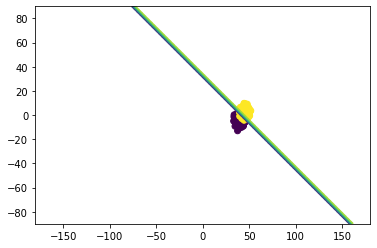

In [33]:
# Another option for interactive plots
#import mpld3
#mpld3.enable_notebook()
plt.scatter(x[:,0], x[:,1], c=y)
cs = plt.contour(lonv,latv,location_prob_c1) #  , [0.2, 0.5, 0.8])
plt.show()
#cs.collections[0].get_paths()

In [31]:
from ipyleaflet import Map, Polyline

m = Map(center=(40.4637, -3.7492), zoom=4)
    
for i, collection in enumerate(cs.collections):
    if collection.get_paths():
        path = collection.get_paths()[0].vertices.tolist()
        line = Polyline(
            locations=path,
                color=linear.RdBu_05(i/len(cs.collections)),
                fill=False
            )
        m.add_layer(line)

m

Map(center=[40.4637, -3.7492], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [32]:
regions = {
    "type": "FeatureCollection",
    "features":[]
}

colors = {str(i): i/len(cs.collections) for i in range(len(cs.collections))}

for i, collection in enumerate(cs.collections):
    if collection.get_paths():
        path = collection.get_paths()[0].vertices.tolist()
        regions["features"].append({
                "type":"Feature",
                "id":str(i),
                "properties":{"name":"Yellow Square"},
                "geometry":{
                    "type":"Polygon",
                    "coordinates": [[path]]
                }
            })

layer = ipyleaflet.Choropleth(
    geo_data=regions,
    choro_data=colors,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.5, 'dashArray': '5, 5'})

m = Map(center=(40.4637, -3.7492), zoom=4)
m.add_layer(layer)
m

Map(center=[40.4637, -3.7492], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…